In [8]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data1 = sio.loadmat('./data/ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [10]:
X = data1['X']
X.shape

(300, 2)

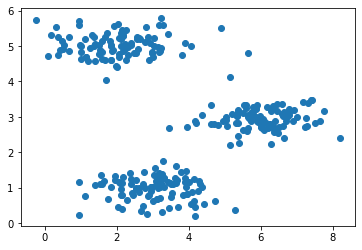

In [11]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [13]:
def find_centroids(X,centros):
    idx = []

    for i in range(len(X)):
        dist = np.linalg.norm((X[i] - centros),axis=1)
        id_i = np.argmin(dist)
        idx.append(id_i)
    
    return np.array(idx)


In [15]:
centros = np.array([[3,3],[6,2],[8,5]])
idx = find_centroids(X,centros)
idx[:3]

array([0, 2, 1], dtype=int64)

In [16]:
def computer_centros(X,idx,k):
    centros = []

    for i in range(k):
        centros_i = np.mean(X[idx==i],axis=0)
        centros.append(centros_i)
    
    return np.array(centros)


In [17]:
computer_centros(X,idx,k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [18]:
def run_kmeans(X,centros,iters):
    k = len(centros)
    centros_all = []
    centros_all.append(centros)
    centros_i = centros
    for i in range (iters):
        idx = find_centroids(X,centros_i)
        centros_i = computer_centros(X,idx,k)
        centros_all.append(centros_i)
    return idx,np.array(centros_all)

In [20]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')

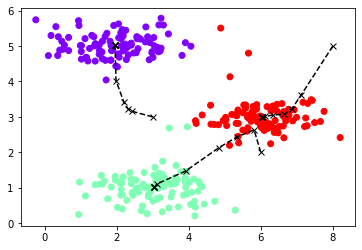

In [23]:
idx,centros_all = run_kmeans(X,centros,iters=10)
plot_data(X,centros_all,idx)

In [24]:
def init_centros(X,k):
    index = np.random.choice(len(X),k)
    return X[index]

In [25]:
init_centros(X,k=3)

array([[6.80029526, 3.17579578],
       [5.73284945, 2.87738132],
       [2.95818429, 1.01887096]])

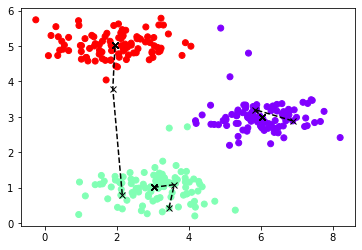

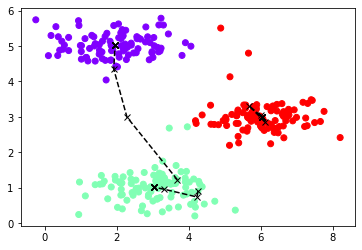

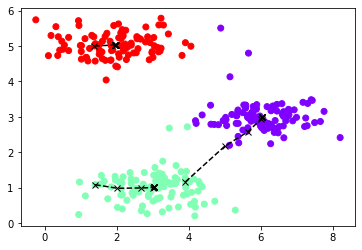

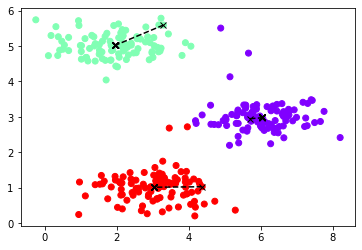

In [27]:
for i in range(4):
    idx,centros_all = run_kmeans(X,init_centros(X,k=3),iters =10 )
    plot_data(X,centros_all,idx)

In [28]:
data = sio.loadmat('./data/bird_small.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [41]:
A = data['A']
A.shape

(128, 128, 3)

In [42]:
from skimage import io

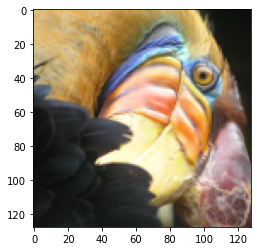

In [43]:
image = io.imread('data/bird_small.png')
plt.imshow(image)

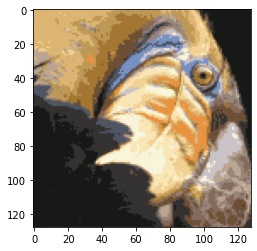

In [44]:
A = A/255
A= A.reshape(-1,3)
k= 16
idx,centros_all = run_kmeans(A,init_centros(A,k=16),iters = 20)
centros = centros_all[-1]
im = np.zeros(A.shape)
for i in range(k):
    im[idx==i] = centros[i]
im = im.reshape(128,128,3)
plt.imshow(im)